## 01. Import libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Create File Path

In [5]:
#  Turn main project folder into path 

path = r'/Users/tanayawinder/Desktop/6-27-2024 Instant Cart Basket Analysis'

In [6]:
# Check output

path

'/Users/tanayawinder/Desktop/6-27-2024 Instant Cart Basket Analysis'

## 03. Import dataset

In [8]:
# Import via OS library

cust_op = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'cust_ords_prods.pkl'))

In [9]:
# Check output

cust_op.shape

(32404859, 31)

In [10]:
# Expand to show all columns 

pd.set_option('display.max_columns', None)

In [11]:
# Check output

cust_op.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both


## 4.10 Task Part 1

### #2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The customer dataset originally included PII in the form of complete customer names along with state, age, and marital status. First and last name of customers was dropped before merging datasets to make customers unidentifiable. 

### #3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [16]:
# Define a function to map states to regions using if statements

def region_label (row):
    if row ['state'] in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey'):
       return 'Northeast'
    elif row ['state'] in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
       return 'Midwest'
    elif row ['state'] in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        return 'South'
    elif row ['state'] in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        return 'West'
    else: return 'Region Not Found'

In [17]:
# Create new column

cust_op['region'] = cust_op.apply(region_label, axis=1)

In [18]:
# Check output

cust_op.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest


In [19]:
cust_op['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [20]:
len(cust_op)

32404859

In [21]:
crosstab = pd.crosstab(cust_op['spender_flag'],cust_op['region'], dropna = False)

In [22]:
crosstab

region,Midwest,Northeast,South,West
spender_flag,,,,
High_spender,155975,108225,209691,160354
Low_spender,7441350,5614511,10582194,8132559


South is the region with the most amount of both High- and Low-spenders, and thus most customers overall. The amount of High-spenders in the South is significatly higher than the other regions. 

In [24]:
# Copy crosstab to clipboard for use in excel

crosstab.to_clipboard()

### #4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample.

In [26]:
# Create an exclusion flag column

cust_op.loc[cust_op['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
cust_op.loc[cust_op['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [27]:
# Check output

cust_op.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded


In [28]:
cust_op.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag
32404854,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,38750,11,0,"Protein Bar, Chocolate Pretzel",3,19,4.7,Low range product,Regularly busy,Regularly busy,Most orders,4,New customer,3.886667,Low_spender,12.0,Regular customer,both,Northeast,Excluded
32404855,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,39972,5,0,Chocolate Fudge High Protein Bar,3,19,4.0,Low range product,Regularly busy,Regularly busy,Most orders,4,New customer,3.886667,Low_spender,12.0,Regular customer,both,Northeast,Excluded
32404856,80148,Female,New York,55,4/1/2020,1,married,57095,3209855,4,6,19,7.0,3198,2,0,Pumpkin Spice Latte Iced Coffee Pure Cold Brew...,26,7,4.7,Low range product,Regularly busy,Regularly busy,Average orders,4,New customer,3.886667,Low_spender,12.0,Regular customer,both,Northeast,Excluded
32404857,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,39069,2,0,Chocolate Coconut Almond Protein Bar,3,19,1.8,Low range product,Regularly busy,Regularly busy,Most orders,4,New customer,3.886667,Low_spender,12.0,Regular customer,both,Northeast,Excluded
32404858,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,21167,1,0,Lemon Vanilla Luna Protein,3,19,6.0,Mid range product,Regularly busy,Regularly busy,Most orders,4,New customer,3.886667,Low_spender,12.0,Regular customer,both,Northeast,Excluded


In [29]:
cust_op['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [30]:
len(cust_op['exclusion_flag'])

32404859

In [31]:
# Create a new df with only Not Excluded data

cust_op_without_low_activity = cust_op[cust_op['exclusion_flag']=='Not Excluded']

In [32]:
# Check output

cust_op_without_low_activity.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,Not Excluded


In [33]:
cust_op_without_low_activity.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag
32404813,135902,Female,Missouri,66,4/1/2020,2,married,53374,974951,1,6,17,NaN,31136,1,0,Original Flavor Sugar Free Gum 3 Pk,46,19,4.9,Low range product,Regularly busy,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent Customer,both,Midwest,Not Excluded
32404814,135902,Female,Missouri,66,4/1/2020,2,married,53374,628984,4,5,14,13.0,31136,9,1,Original Flavor Sugar Free Gum 3 Pk,46,19,4.9,Low range product,Regularly busy,Regularly busy,Most orders,8,New customer,6.960345,Low_spender,8.0,Frequent Customer,both,Midwest,Not Excluded
32404815,135902,Female,Missouri,66,4/1/2020,2,married,53374,1157983,7,5,15,7.0,31136,2,1,Original Flavor Sugar Free Gum 3 Pk,46,19,4.9,Low range product,Regularly busy,Regularly busy,Most orders,8,New customer,6.960345,Low_spender,8.0,Frequent Customer,both,Midwest,Not Excluded
32404816,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,6,21,8.0,32312,7,0,Glide Pro-Health Comfort Plus Mint Floss,20,11,8.4,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,6.960345,Low_spender,8.0,Frequent Customer,both,Midwest,Not Excluded
32404817,135902,Female,Missouri,66,4/1/2020,2,married,53374,1104840,3,6,11,23.0,4909,5,0,Sweet Hot Mustard with Honey,72,13,7.7,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,6.960345,Low_spender,8.0,Frequent Customer,both,Midwest,Not Excluded


In [34]:
# Export created dataframe

cust_op_without_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','cust_op_high_activity_only.pkl'))

### #5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [36]:
# Create a df of only unique user_ids from cust_op_wo_low_activity

cust_op_wo_low_activity = cust_op_without_low_activity.drop_duplicates(subset='user_id')

In [37]:
# Explore data to find parameters for age, income, family status, and dependents
cust_op_wo_low_activity[['age', 'income', 'family_status', 'number_of_dependants']].describe()

,age,income,number_of_dependants
count,162631.000000,162631.000000,162631.000000
mean,49.531375,95686.508821,1.498675
std,18.475491,42743.386453,1.118166
min,18.000000,25903.000000,0.000000
25%,34.000000,61717.500000,0.000000
50%,49.000000,94292.000000,1.000000
75%,66.000000,125165.000000,2.000000
max,81.000000,593901.000000,3.000000


In [38]:
# Suppress scientific notation

pd.options.display.float_format = '{:.0f}'.format

In [39]:
cust_op_wo_low_activity[['age', 'income', 'number_of_dependants']].describe()

,age,income,number_of_dependants
count,162631,162631,162631
mean,50,95687,1
std,18,42743,1
min,18,25903,0
25%,34,61718,0
50%,49,94292,1
75%,66,125165,2
max,81,593901,3


Based on the information above and the available family_status conditions, we can create flags based on 

- income

- age

- family status

- number of dependants

to create a customer profile.


In [41]:
# Create a new column for income_flag

cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income'] > 2900) & (cust_op_wo_low_activity['income'] <= 59999),'income_flag'] = 'Low Income'

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/3938630531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income'] > 2900) & (cust_op_wo_low_activity['income'] <= 59999),'income_flag'] = 'Low Income'


In [42]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income'] >= 60000) & (cust_op_wo_low_activity['income'] <= 99999),'income_flag'] = 'Middle Income'

In [43]:
cust_op_wo_low_activity.loc[cust_op_wo_low_activity['income'] > 100000,'income_flag'] = 'High Income'

In [44]:
# Check output

cust_op_wo_low_activity.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income


In [45]:
cust_op_wo_low_activity.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag
32404577,179673,Male,Wyoming,77,4/1/2020,0,divorced/widowed,162239,1359882,3,3,10,0,31683,3,0,Original No Pulp 100% Florida Orange Juice,31,7,2,Low range product,Regularly busy,Slowest days,Most orders,6,New customer,10,Low_spender,2,Frequent Customer,both,West,Not Excluded,High Income
32404593,75529,Female,West Virginia,25,4/1/2020,2,married,56513,1491409,3,0,19,30,42828,6,0,Whipped Cream Cheese,108,16,2,Low range product,Busiest day,Busiest days,Average orders,8,New customer,8,Low_spender,30,Non-frequent Customer,both,South,Not Excluded,Low Income
32404629,157533,Male,Utah,53,4/1/2020,0,single,35973,1454943,6,6,8,13,20995,6,0,Organic Broccoli Florets,116,1,8,Mid range product,Regularly busy,Regularly busy,Average orders,6,New customer,7,Low_spender,9,Frequent Customer,both,West,Not Excluded,Low Income
32404665,122741,Male,Michigan,24,4/1/2020,2,married,73357,2838980,10,2,13,30,48171,6,0,Shredded Hash Browns,129,1,15,Mid range product,Regularly busy,Regularly busy,Most orders,10,New customer,9,Low_spender,30,Non-frequent Customer,both,Midwest,Not Excluded,Middle Income
32404760,135902,Female,Missouri,66,4/1/2020,2,married,53374,974951,1,6,17,NaN,31268,3,0,Sandwich Bags,85,17,12,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7,Low_spender,8,Frequent Customer,both,Midwest,Not Excluded,Low Income


In [46]:
# Create a new column for age_flag

cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['age'] >= 18) & (cust_op_wo_low_activity['age'] <= 25),'age_flag'] = 'Young Adult'

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/3031298795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['age'] >= 18) & (cust_op_wo_low_activity['age'] <= 25),'age_flag'] = 'Young Adult'


In [47]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['age'] >= 26) & (cust_op_wo_low_activity['age'] <= 64),'age_flag'] = 'Adult'

In [48]:
cust_op_wo_low_activity.loc[cust_op_wo_low_activity['age'] >= 65,'age_flag'] = 'Senior'

In [49]:
# Check output

cust_op_wo_low_activity.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income,Adult
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income,Adult
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income,Adult
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income,Adult


In [50]:
# Check output

cust_op_wo_low_activity.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag
32404577,179673,Male,Wyoming,77,4/1/2020,0,divorced/widowed,162239,1359882,3,3,10,0,31683,3,0,Original No Pulp 100% Florida Orange Juice,31,7,2,Low range product,Regularly busy,Slowest days,Most orders,6,New customer,10,Low_spender,2,Frequent Customer,both,West,Not Excluded,High Income,Senior
32404593,75529,Female,West Virginia,25,4/1/2020,2,married,56513,1491409,3,0,19,30,42828,6,0,Whipped Cream Cheese,108,16,2,Low range product,Busiest day,Busiest days,Average orders,8,New customer,8,Low_spender,30,Non-frequent Customer,both,South,Not Excluded,Low Income,Young Adult
32404629,157533,Male,Utah,53,4/1/2020,0,single,35973,1454943,6,6,8,13,20995,6,0,Organic Broccoli Florets,116,1,8,Mid range product,Regularly busy,Regularly busy,Average orders,6,New customer,7,Low_spender,9,Frequent Customer,both,West,Not Excluded,Low Income,Adult
32404665,122741,Male,Michigan,24,4/1/2020,2,married,73357,2838980,10,2,13,30,48171,6,0,Shredded Hash Browns,129,1,15,Mid range product,Regularly busy,Regularly busy,Most orders,10,New customer,9,Low_spender,30,Non-frequent Customer,both,Midwest,Not Excluded,Middle Income,Young Adult
32404760,135902,Female,Missouri,66,4/1/2020,2,married,53374,974951,1,6,17,NaN,31268,3,0,Sandwich Bags,85,17,12,Mid range product,Regularly busy,Regularly busy,Average orders,8,New customer,7,Low_spender,8,Frequent Customer,both,Midwest,Not Excluded,Low Income,Senior


In [51]:
# Check data type of dependents column

cust_op_wo_low_activity['number_of_dependants'].dtypes

dtype('int64')

In [52]:
# Create new column for family_or_single flag

cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['number_of_dependants'] > 0), 'family_flag'] = 'Family'

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/4182598385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['number_of_dependants'] > 0), 'family_flag'] = 'Family'


In [53]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['family_status'] == 'living with parents and siblings'), 'family_flag'] = 'Family'

In [54]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['number_of_dependants'] == 0) & (cust_op_wo_low_activity['family_status'] == 'single'),'family_flag'] = 'Single'

In [55]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['number_of_dependants'] == 0) & (cust_op_wo_low_activity['family_status'] == 'divorced/widowed'),'family_flag'] = 'Single'

In [56]:
# Check output

cust_op_wo_low_activity['family_flag'].value_counts()

family_flag
Family    121904
Single     40727
Name: count, dtype: int64

In [57]:
cust_op_wo_low_activity.shape

(162631, 36)

In [58]:
23224883 + 7739681

30964564

In [59]:
cust_op_wo_low_activity.head(100)

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income,Adult,Family
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Single
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income,Adult,Single
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income,Adult,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,90628,Male,Alabama,28,1/1/2017,0,single,32517,485420,2,2,14,30,24852,18,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Most orders,7,New customer,7,Low_spender,19,Regular customer,both,South,Not Excluded,Low Income,Adult,Single
17400,92718,Female,Wyoming,30,1/1/2017,2,married,86989,105280,2,0,14,24,24852,3,0,Banana,24,4,12,Mid range product,Busiest day,Busiest days,Most orders,7,New customer,9,Low_spender,24,Non-frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family
17476,101664,Female,Montana,46,1/1/2017,2,married,155783,2655417,1,2,12,NaN,24852,9,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7,Low_spender,6,Frequent Customer,both,West,Not Excluded,High Income,Adult,Family
17606,141012,Male,Washington,39,1/1/2017,2,married,49188,2238841,3,5,13,22,24852,4,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Most orders,11,Regular customer,9,Low_spender,22,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Family


In [60]:
cust_op_wo_low_activity.tail(100)

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag
32386341,135728,Female,Kansas,36,4/1/2020,0,single,33821,1481554,8,5,10,30,13176,5,0,Bag of Organic Bananas,24,4,10,Mid range product,Regularly busy,Regularly busy,Most orders,13,Regular customer,6,Low_spender,20,Regular customer,both,Midwest,Not Excluded,Low Income,Adult,Single
32386408,136265,Female,Texas,24,4/1/2020,0,single,52778,3293978,7,0,11,16,13176,1,0,Bag of Organic Bananas,24,4,10,Mid range product,Busiest day,Busiest days,Most orders,9,New customer,9,Low_spender,12,Regular customer,both,South,Not Excluded,Low Income,Young Adult,Single
32386494,136776,Male,Utah,47,4/1/2020,1,married,98651,2552236,3,5,17,5,13176,13,0,Bag of Organic Bananas,24,4,10,Mid range product,Regularly busy,Regularly busy,Average orders,7,New customer,9,Low_spender,5,Frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family
32386578,150437,Female,Missouri,25,4/1/2020,3,married,84030,1616266,1,5,12,NaN,13176,2,0,Bag of Organic Bananas,24,4,10,Mid range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7,Low_spender,6,Frequent Customer,both,Midwest,Not Excluded,Middle Income,Young Adult,Family
32386766,151198,Male,Massachusetts,51,4/1/2020,2,married,159832,574755,7,1,9,30,13176,12,0,Bag of Organic Bananas,24,4,10,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,9,Low_spender,30,Non-frequent Customer,both,Northeast,Not Excluded,High Income,Adult,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404577,179673,Male,Wyoming,77,4/1/2020,0,divorced/widowed,162239,1359882,3,3,10,0,31683,3,0,Original No Pulp 100% Florida Orange Juice,31,7,2,Low range product,Regularly busy,Slowest days,Most orders,6,New customer,10,Low_spender,2,Frequent Customer,both,West,Not Excluded,High Income,Senior,Single
32404593,75529,Female,West Virginia,25,4/1/2020,2,married,56513,1491409,3,0,19,30,42828,6,0,Whipped Cream Cheese,108,16,2,Low range product,Busiest day,Busiest days,Average orders,8,New customer,8,Low_spender,30,Non-frequent Customer,both,South,Not Excluded,Low Income,Young Adult,Family
32404629,157533,Male,Utah,53,4/1/2020,0,single,35973,1454943,6,6,8,13,20995,6,0,Organic Broccoli Florets,116,1,8,Mid range product,Regularly busy,Regularly busy,Average orders,6,New customer,7,Low_spender,9,Frequent Customer,both,West,Not Excluded,Low Income,Adult,Single
32404665,122741,Male,Michigan,24,4/1/2020,2,married,73357,2838980,10,2,13,30,48171,6,0,Shredded Hash Browns,129,1,15,Mid range product,Regularly busy,Regularly busy,Most orders,10,New customer,9,Low_spender,30,Non-frequent Customer,both,Midwest,Not Excluded,Middle Income,Young Adult,Family


In [61]:
cust_op_wo_low_activity.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
number_of_dependants         int64
family_status               object
income                       int64
order_id                    object
number_of_orders             int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_spend                  float64
spender_flag                object
customer_frequency  

In [62]:
cust_op_wo_low_activity['user_id'] = cust_op_wo_low_activity['user_id'].astype(str)

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/1730465676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity['user_id'] = cust_op_wo_low_activity['user_id'].astype(str)


In [63]:
cust_op_wo_low_activity['order_id'] = cust_op_wo_low_activity['order_id'].astype(str)

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/2131426975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity['order_id'] = cust_op_wo_low_activity['order_id'].astype(str)


In [64]:
cust_op_wo_low_activity['order_hour_of_day'] = cust_op_wo_low_activity['order_hour_of_day'].astype(str)

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/3297415825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity['order_hour_of_day'] = cust_op_wo_low_activity['order_hour_of_day'].astype(str)


In [65]:
# Check Single customers are correctly labeled

sorted_df = cust_op_wo_low_activity.sort_values(by=['number_of_dependants'], ascending=True)

In [66]:
sorted_df.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag
9767210,191194,Male,Vermont,34,12/23/2017,0,single,58511,1364886,18,0,8,14,13176,2,0,Bag of Organic Bananas,24,4,10,Mid range product,Busiest day,Busiest days,Average orders,19,Regular customer,8,Low_spender,17,Regular customer,both,Northeast,Not Excluded,Low Income,Adult,Single
14523929,71820,Female,Hawaii,28,6/15/2018,0,single,57803,2286183,1,1,9,NaN,1559,5,0,Cherry Pomegranate Greek Yogurt,120,16,10,Mid range product,Regularly busy,Busiest days,Average orders,19,Regular customer,8,Low_spender,13,Regular customer,both,West,Not Excluded,Low Income,Adult,Single
7045241,126690,Female,Colorado,41,9/14/2017,0,single,46176,2070665,1,1,16,NaN,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,6,New customer,6,Low_spender,30,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Single
7045257,136421,Female,Virginia,42,9/14/2017,0,single,161904,1869510,24,3,13,0,196,8,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,99,Loyal customer,8,Low_spender,4,Frequent Customer,both,South,Not Excluded,High Income,Adult,Single
7046066,173145,Male,Wyoming,23,9/14/2017,0,single,31048,1075881,8,1,16,12,196,4,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,40,Regular customer,6,Low_spender,8,Frequent Customer,both,West,Not Excluded,Low Income,Young Adult,Single


In [67]:
# Based on the three flagged columns, create customer profile column

cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Low-Income Young Adult'

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/19144886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Low-Income Young Adult'


In [68]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Low-Income Young Family'



In [69]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Mid-Income Young Adult'


In [70]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Mid-Income Young Family'


In [71]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'High-Income Young Adult'


In [72]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Young Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'High-Income Young Family'


In [73]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Low-Income Adult'

In [74]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Low-Income Family'

In [75]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Mid-Income Adult'

In [76]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Mid-Income Family'

In [77]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'High-Income Adult'

In [78]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Adult') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'High-Income Family'

In [79]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Low-Income Senior'

In [80]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Low Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Low-Income Senior with Family'

In [81]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'Mid-Income Senior'

In [82]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'Middle Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'Mid-Income Senior with Family'

In [83]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Single'),'customer_profile'] = 'High-Income Senior'

In [84]:
cust_op_wo_low_activity.loc[(cust_op_wo_low_activity['income_flag'] == 'High Income') & (cust_op_wo_low_activity['age_flag'] == 'Senior') & (cust_op_wo_low_activity['family_flag'] == 'Family'),'customer_profile'] = 'High-Income Senior with Family'

In [85]:
# Check output

cust_op_wo_low_activity.head(100)

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income,Adult,Family,High-Income Family
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Single,Low-Income Adult
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family,Mid-Income Family
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income,Adult,Single,Low-Income Adult
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income,Adult,Family,Low-Income Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,90628,Male,Alabama,28,1/1/2017,0,single,32517,485420,2,2,14,30,24852,18,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Most orders,7,New customer,7,Low_spender,19,Regular customer,both,South,Not Excluded,Low Income,Adult,Single,Low-Income Adult
17400,92718,Female,Wyoming,30,1/1/2017,2,married,86989,105280,2,0,14,24,24852,3,0,Banana,24,4,12,Mid range product,Busiest day,Busiest days,Most orders,7,New customer,9,Low_spender,24,Non-frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family,Mid-Income Family
17476,101664,Female,Montana,46,1/1/2017,2,married,155783,2655417,1,2,12,NaN,24852,9,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7,Low_spender,6,Frequent Customer,both,West,Not Excluded,High Income,Adult,Family,High-Income Family
17606,141012,Male,Washington,39,1/1/2017,2,married,49188,2238841,3,5,13,22,24852,4,0,Banana,24,4,12,Mid range product,Regularly busy,Regularly busy,Most orders,11,Regular customer,9,Low_spender,22,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Family,Low-Income Family


In [86]:
cust_op_wo_low_activity.shape

(162631, 37)

In [87]:
cust_op_wo_low_activity['customer_profile'].shape

(162631,)

## Flag Makeups, Overall Customer Profiles, Overall Users by Region

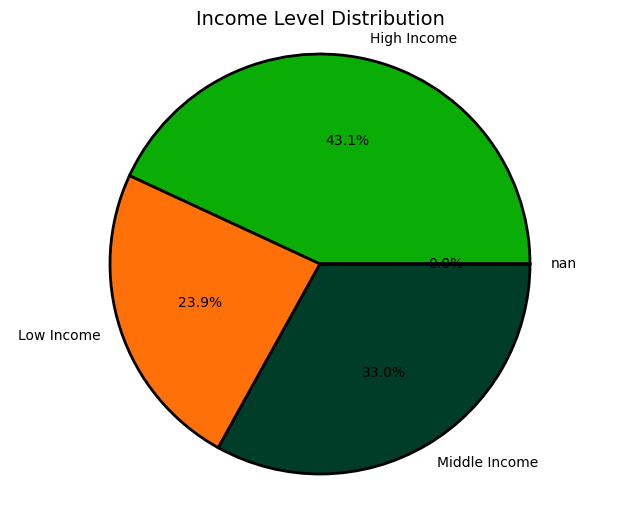

In [89]:
# Create a pie chart for the distribution of income types and export it as a png file
income_level_distribution = (cust_op_wo_low_activity['income_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_level_distribution, labels=income_level_distribution.index, autopct='%1.1f%%', colors=['#0AAD05', '#FF7009', '#003D29'], wedgeprops={"edgecolor":"black",'linewidth': 2})
plt.title('Income Level Distribution', fontsize=14)
plt.axis('equal') 
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Income_Level_Pie_chart.png'))

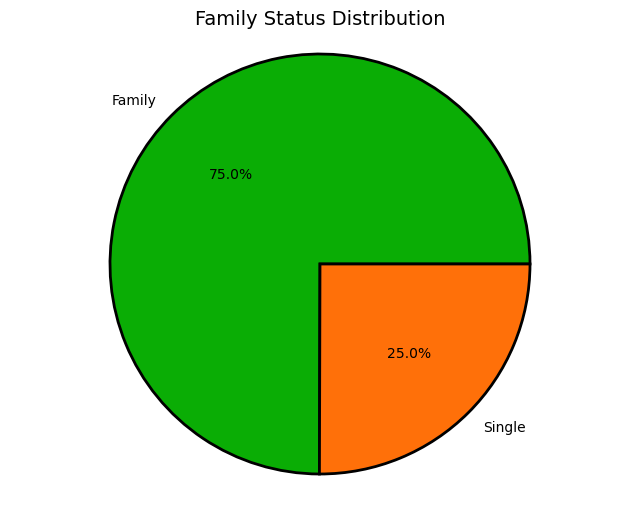

In [90]:
# Create a pie chart for the distribution of income types and export it as a png file
income_level_distribution = (cust_op_wo_low_activity['family_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_level_distribution, labels=income_level_distribution.index, autopct='%1.1f%%', colors=['#0AAD05', '#FF7009'], wedgeprops={"edgecolor":"black",'linewidth': 2})
plt.title('Family Status Distribution', fontsize=14)
plt.axis('equal') 

plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Family_Status_Pie_chart.png'))

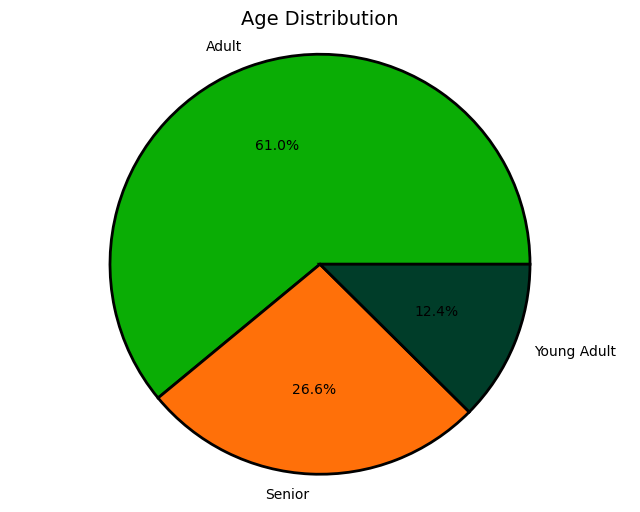

In [91]:
# Create a pie chart for the distribution of income types and export it as a png file
income_level_distribution = (cust_op_wo_low_activity['age_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_level_distribution, labels=income_level_distribution.index, autopct='%1.1f%%', colors=['#0AAD05', '#FF7009', '#003D29'], wedgeprops={"edgecolor":"black",'linewidth': 2})
plt.title('Age Distribution', fontsize=14)
plt.axis('equal') 
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Age_Status_Pie_chart.png'))

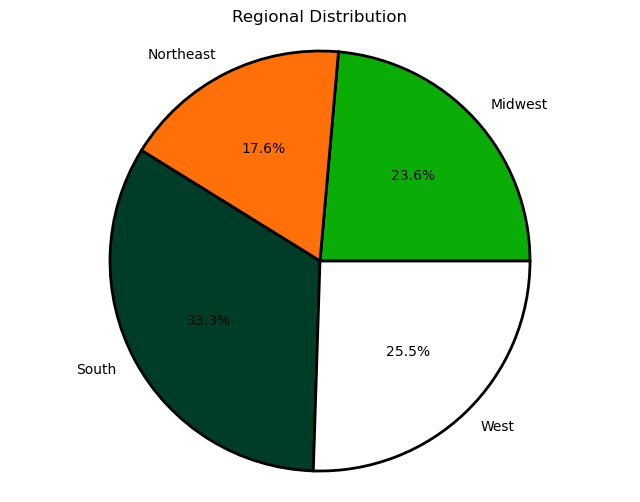

In [92]:
# Create a pie chart for the customer distribution by region 
income_level_distribution = (cust_op_wo_low_activity['region'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_level_distribution, labels=income_level_distribution.index, autopct='%1.1f%%', colors=['#0AAD05', '#FF7009', '#003D29', '#FFFFFF'], wedgeprops={"edgecolor":"black",'linewidth': 2})
plt.title('Regional Distribution', fontsize=12)
plt.axis('equal') 
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Regional_Distribution_Pie_chart.png'))

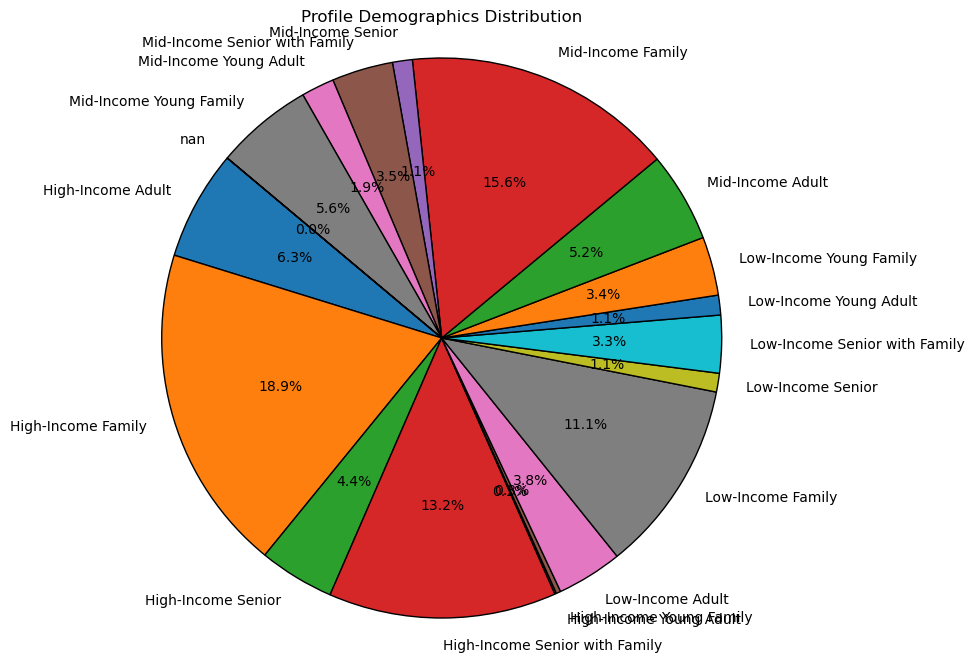

In [93]:
income_level_distribution = (cust_op_wo_low_activity['customer_profile'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(10, 8))  # Increase the figure size for better label readability
plt.pie(income_level_distribution, labels=income_level_distribution.index, autopct='%1.1f%%', wedgeprops={"edgecolor":"black",'linewidth': 1}, startangle=140)  # Adjust startangle for better label positioning
plt.title('Profile Demographics Distribution', fontsize=12)
plt.axis('equal')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_Piechart.png'))

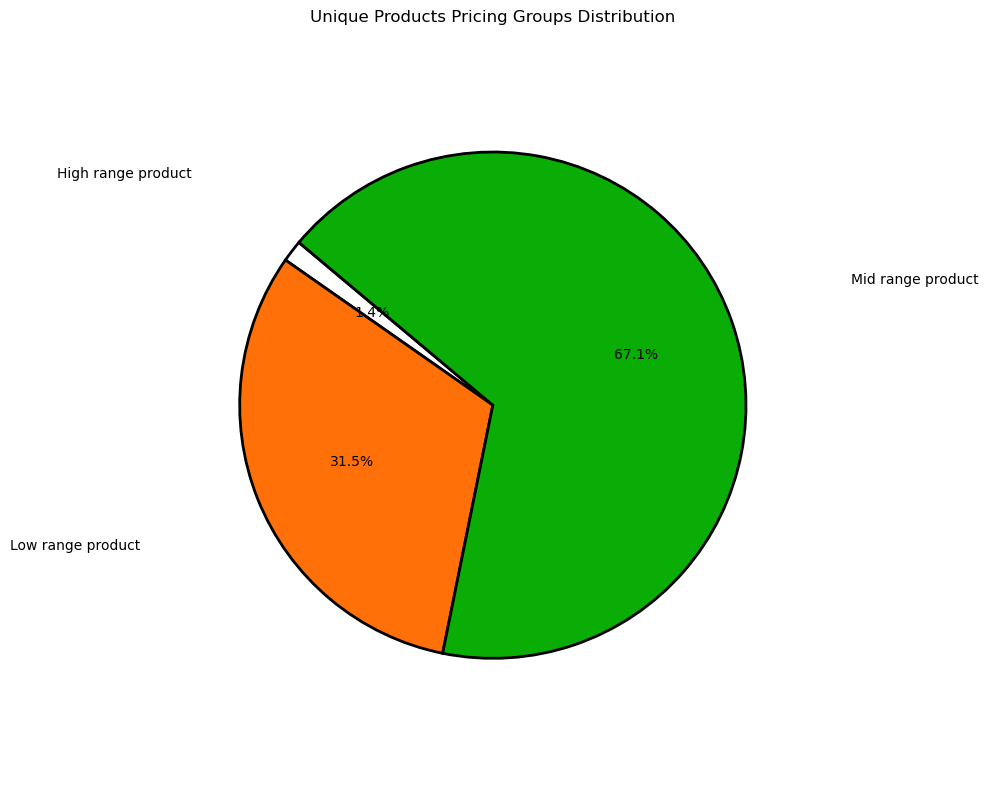

In [339]:
# Filter unique products
unique_products = cust_op_wo_low_activity.drop_duplicates(subset=['product_id'])

# Calculate the distribution of unique products based on price groups
unique_price_groups_distribution = (unique_products['price_range'].value_counts(normalize=True) * 100).sort_index()

# Create a pie chart

plt.figure(figsize=(10, 8))
plt.pie(unique_price_groups_distribution, labels=unique_price_groups_distribution.index, autopct='%1.1f%%', labeldistance= 1.5, colors=['#FFFFFF','#FF7009','#0AAD05'], wedgeprops={"edgecolor":"black",'linewidth': 2}, startangle=140)
plt.title('Unique Products Pricing Groups Distribution', fontsize=12)
plt.axis('equal')

plt.tight_layout()  # Adjust padding and margins

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Unique_Products_Pricing_pie_chart.png'))

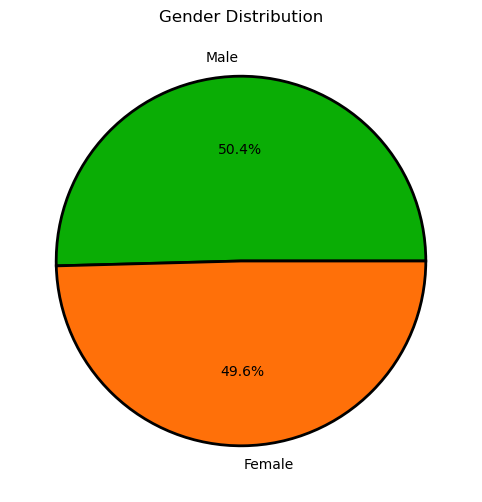

In [95]:

# Calculate gender counts
gender_counts = cust_op_wo_low_activity['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#0AAD05', '#FF7009'], wedgeprops={"edgecolor":"black",'linewidth': 2})
plt.title('Gender Distribution')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_gender_distribution_pie.png'))  # Export the visualization to a file
plt.show()




# Export other visualizations to files


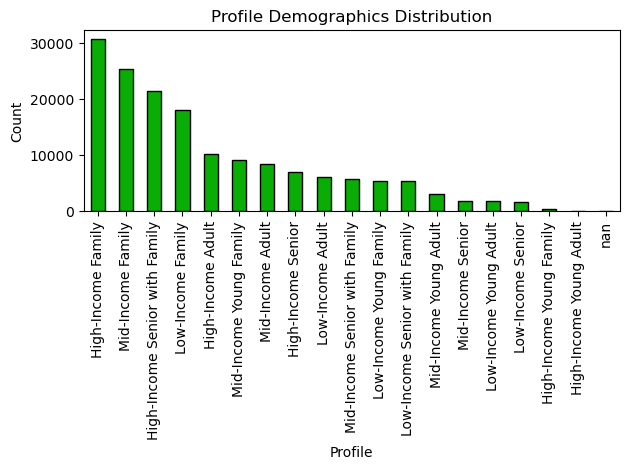

In [96]:
# Create bar chart to illustrate the above pie graph more clearly

bar_2 = cust_op_wo_low_activity['customer_profile'].value_counts().plot.bar(color=['#0AAD05'], edgecolor = 'black')
plt.title('Profile Demographics Distribution', fontsize=12)
plt.xlabel('Profile')
plt.ylabel('Count')
plt.tight_layout()
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_Barchart.png'))

In [97]:
crosstab_reg_custprofile =  pd.crosstab(cust_op_wo_low_activity['region'],cust_op_wo_low_activity['customer_profile'], dropna = False)

In [98]:
crosstab_reg_custprofile.head()

customer_profile,High-Income Adult,High-Income Family,High-Income Senior,High-Income Senior with Family,High-Income Young Adult,High-Income Young Family,Low-Income Adult,Low-Income Family,Low-Income Senior,Low-Income Senior with Family,Low-Income Young Adult,Low-Income Young Family,Mid-Income Adult,Mid-Income Family,Mid-Income Senior,Mid-Income Senior with Family,Mid-Income Young Adult,Mid-Income Young Family,nan
region,,,,,,,,,,,,,,,,,,,
Midwest,2479,7425,1611,5088,40,113,1420,4254,409,1271,407,1279,2050,5870,446,1344,704,2166,0
Northeast,1811,5471,1318,3695,17,57,1087,3206,304,919,345,929,1475,4477,318,1026,580,1546,0
South,3393,10061,2369,7131,56,146,2067,6056,556,1828,608,1860,2763,8569,643,1906,1082,3098,1
West,2617,7772,1786,5477,38,109,1596,4588,487,1390,500,1439,2156,6520,456,1472,733,2345,0


In [99]:
crosstab_reg_custprofile_2 = crosstab_reg_custprofile.drop(columns = ['nan'])

In [100]:
crosstab_reg_custprofile_2.head()

customer_profile,High-Income Adult,High-Income Family,High-Income Senior,High-Income Senior with Family,High-Income Young Adult,High-Income Young Family,Low-Income Adult,Low-Income Family,Low-Income Senior,Low-Income Senior with Family,Low-Income Young Adult,Low-Income Young Family,Mid-Income Adult,Mid-Income Family,Mid-Income Senior,Mid-Income Senior with Family,Mid-Income Young Adult,Mid-Income Young Family
region,,,,,,,,,,,,,,,,,,
Midwest,2479,7425,1611,5088,40,113,1420,4254,409,1271,407,1279,2050,5870,446,1344,704,2166
Northeast,1811,5471,1318,3695,17,57,1087,3206,304,919,345,929,1475,4477,318,1026,580,1546
South,3393,10061,2369,7131,56,146,2067,6056,556,1828,608,1860,2763,8569,643,1906,1082,3098
West,2617,7772,1786,5477,38,109,1596,4588,487,1390,500,1439,2156,6520,456,1472,733,2345


In [101]:
# Create long table for clustered bar graph
reg_profile_long = crosstab_reg_custprofile_2.reset_index().melt(id_vars = 'region', var_name = 'customer_profile', value_name = 'count')

In [102]:
reg_profile_long.tail(10)

,region,customer_profile,count
62,South,Mid-Income Senior with Family,1906
63,West,Mid-Income Senior with Family,1472
64,Midwest,Mid-Income Young Adult,704
65,Northeast,Mid-Income Young Adult,580
66,South,Mid-Income Young Adult,1082
67,West,Mid-Income Young Adult,733
68,Midwest,Mid-Income Young Family,2166
69,Northeast,Mid-Income Young Family,1546
70,South,Mid-Income Young Family,3098
71,West,Mid-Income Young Family,2345


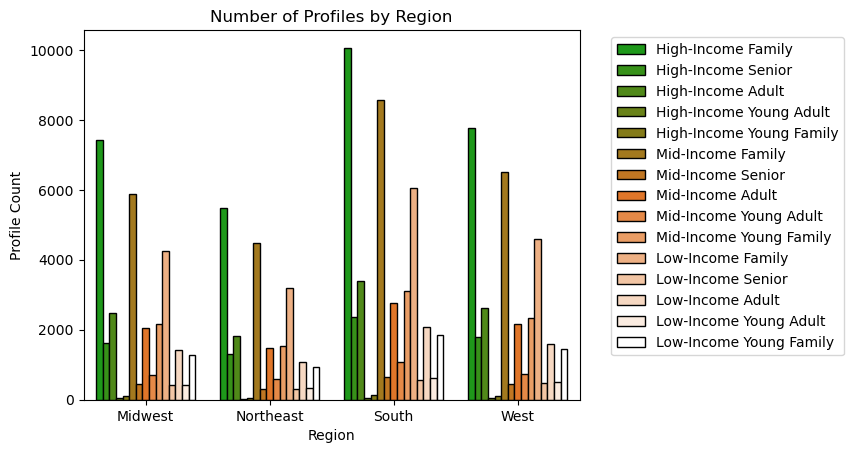

In [103]:
# Define the desired order of the legend labels
hue_order = ['High-Income Family', 'High-Income Senior', 'High-Income Adult', 'High-Income Young Adult', 'High-Income Young Family','Mid-Income Family', 'Mid-Income Senior', 'Mid-Income Adult', 'Mid-Income Young Adult', 'Mid-Income Young Family', 'Low-Income Family', 'Low-Income Senior', 'Low-Income Adult', 'Low-Income Young Adult', 'Low-Income Young Family']  # Replace with the actual labels in the desired order

# Create the clustered bar graph with the specified hue order
reg_profile_bar = sns.barplot(x='region', y='count', hue='customer_profile', data=reg_profile_long, palette="blend:#0AAD05,#FF7009,#FFFFFF", edgecolor="black", hue_order=hue_order)

# Add axis, legend, and title labels
plt.xlabel('Region')
plt.ylabel('Profile Count')
plt.title('Number of Profiles by Region')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1)) 

# Save Clustered Bar Graph
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_byRegion_Clusterchart.png'),bbox_inches='tight')



In [104]:
crosstab_orders_custprofile =  pd.crosstab(cust_op_wo_low_activity['number_of_orders'],cust_op_wo_low_activity['customer_profile'], dropna = False)

In [105]:
crosstab_orders_custprofile.head()

customer_profile,High-Income Adult,High-Income Family,High-Income Senior,High-Income Senior with Family,High-Income Young Adult,High-Income Young Family,Low-Income Adult,Low-Income Family,Low-Income Senior,Low-Income Senior with Family,Low-Income Young Adult,Low-Income Young Family,Mid-Income Adult,Mid-Income Family,Mid-Income Senior,Mid-Income Senior with Family,Mid-Income Young Adult,Mid-Income Young Family,nan
number_of_orders,,,,,,,,,,,,,,,,,,,
1,2676,7919,1834,5544,33,93,1619,4671,462,1467,502,1394,2161,6731,510,1454,826,2435,1
2,1400,4264,966,2919,22,55,858,2618,231,715,249,772,1136,3454,265,774,419,1206,0
3,1020,3001,706,2136,18,39,601,1783,194,563,193,592,840,2517,190,565,300,886,0
4,831,2510,523,1700,8,33,511,1568,156,448,144,452,731,2105,132,462,252,688,0
5,724,2165,483,1517,14,33,476,1377,128,406,125,409,594,1775,130,467,226,670,0


In [106]:
crosstab_orders_custprofile_2 = crosstab_orders_custprofile.drop(columns = ['nan'])

In [107]:
crosstab_orders_custprofile_2.head()

customer_profile,High-Income Adult,High-Income Family,High-Income Senior,High-Income Senior with Family,High-Income Young Adult,High-Income Young Family,Low-Income Adult,Low-Income Family,Low-Income Senior,Low-Income Senior with Family,Low-Income Young Adult,Low-Income Young Family,Mid-Income Adult,Mid-Income Family,Mid-Income Senior,Mid-Income Senior with Family,Mid-Income Young Adult,Mid-Income Young Family
number_of_orders,,,,,,,,,,,,,,,,,,
1,2676,7919,1834,5544,33,93,1619,4671,462,1467,502,1394,2161,6731,510,1454,826,2435
2,1400,4264,966,2919,22,55,858,2618,231,715,249,772,1136,3454,265,774,419,1206
3,1020,3001,706,2136,18,39,601,1783,194,563,193,592,840,2517,190,565,300,886
4,831,2510,523,1700,8,33,511,1568,156,448,144,452,731,2105,132,462,252,688
5,724,2165,483,1517,14,33,476,1377,128,406,125,409,594,1775,130,467,226,670


In [108]:
# Create long table for clustered bar graph
orders_profile_long = crosstab_reg_custprofile_2.reset_index().melt(id_vars = 'region', var_name = 'customer_profile', value_name = 'count')

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/16900171.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  crosstab_orders_custprofile = sns.barplot(x = 'customer_profile', y = 'count', data = orders_profile_long, color='#0AAD05', edgecolor = "black", ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


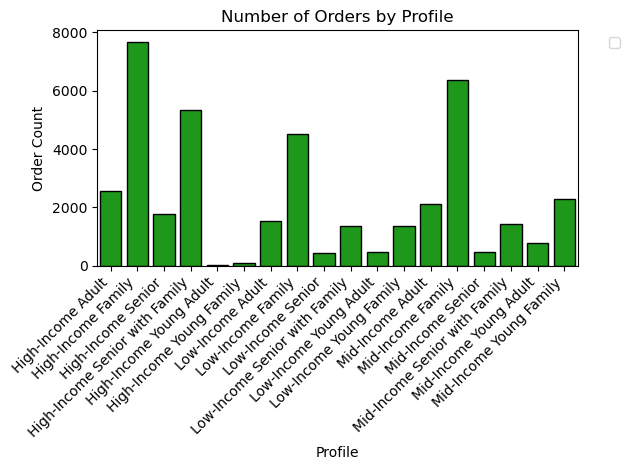

In [109]:
# Create clustered bar graph for region and lifestyle
crosstab_orders_custprofile = sns.barplot(x = 'customer_profile', y = 'count', data = orders_profile_long, color='#0AAD05', edgecolor = "black", ci=None)
# Add axis, legend, and title labels
plt.xlabel('Profile')
plt.ylabel('Order Count')
plt.title('Number of Orders by Profile')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
# Save Clustered Bar Graph
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_Number_of_Orders_Barchart.png'))

In [110]:
orders_profile_long.head()

,region,customer_profile,count
0,Midwest,High-Income Adult,2479
1,Northeast,High-Income Adult,1811
2,South,High-Income Adult,3393
3,West,High-Income Adult,2617
4,Midwest,High-Income Family,7425


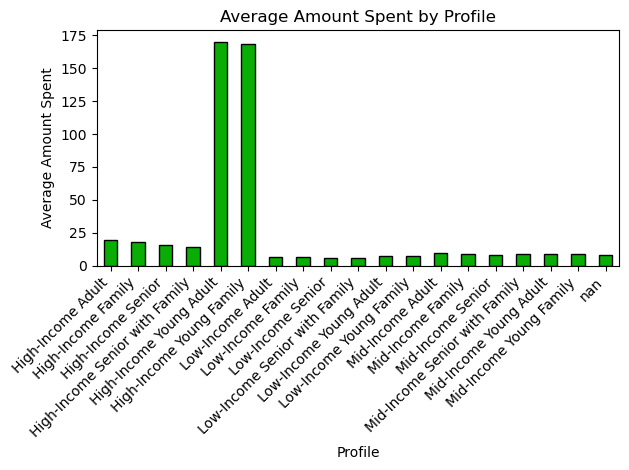

In [111]:
cust_op_wo_low_activity.groupby('customer_profile')['avg_spend'].mean().plot.bar(color='#0AAD05',edgecolor = "black")
plt.xlabel('Profile')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_Avg_Spend_Barchart.png'))

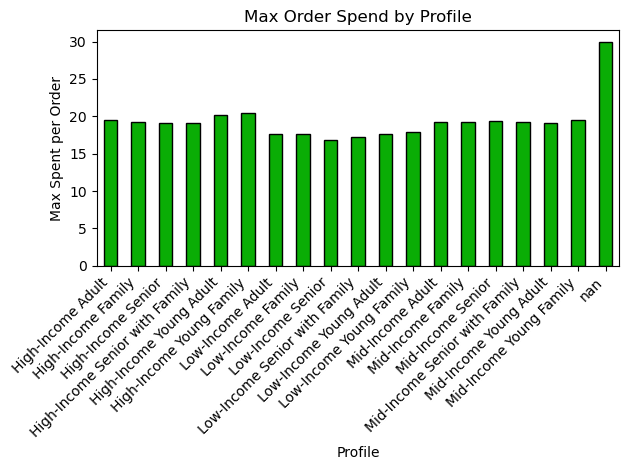

In [112]:
cust_op_wo_low_activity.groupby('customer_profile')['max_order'].mean().plot.bar(color='#0AAD05',edgecolor = "black")
plt.xlabel('Profile')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Max Spent per Order')
plt.title('Max Order Spend by Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Customer_Profile_Max_Spend_Barchart.png'))

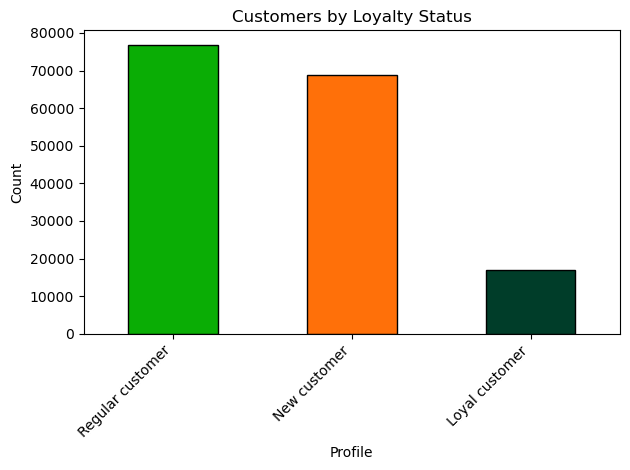

In [113]:
# Create bar chart to illustrate the above pie graph more clearly

bar_3 = cust_op_wo_low_activity['loyalty_flag'].value_counts().plot.bar(color=['#0AAD05', '#FF7009', '#003D29'], edgecolor = 'black')
plt.title('Customers by Loyalty Status', fontsize=12)
plt.xlabel('Profile')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count')
plt.tight_layout()
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','ICLoyalty_Status_Count_Barchart.png'))

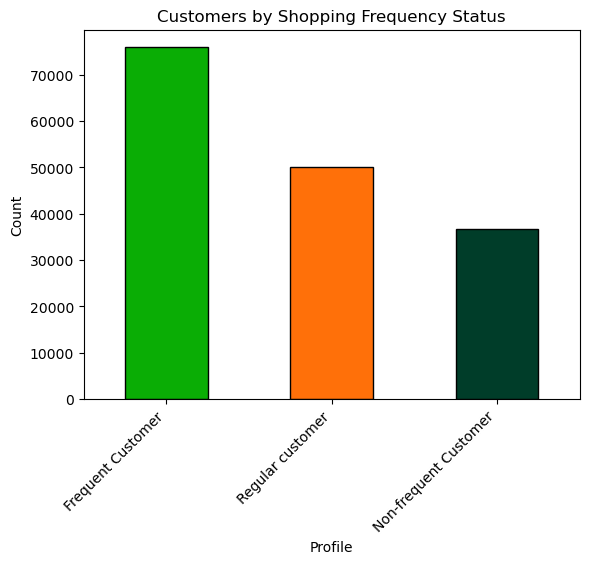

In [114]:
# Create bar chart to illustrate the above pie graph more clearly

bar_4 = cust_op_wo_low_activity['frequency_flag'].value_counts().plot.bar(color=['#0AAD05', '#FF7009', '#003D29'], edgecolor = 'black')
plt.title('Customers by Shopping Frequency Status', fontsize=12)
plt.xlabel('Profile')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.plot()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Frequency_Status_Count_Barchart.png'))

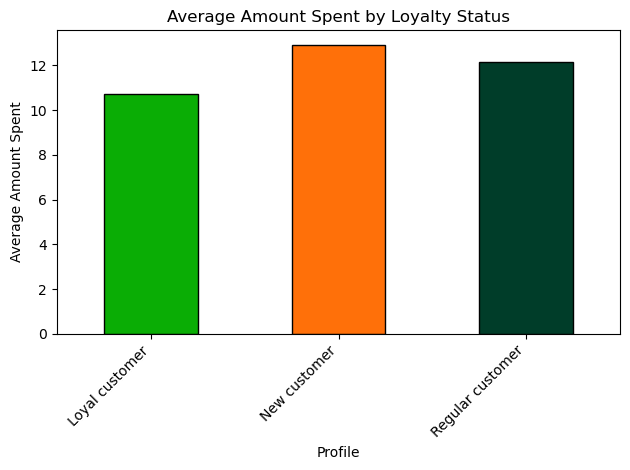

In [115]:
cust_op_wo_low_activity.groupby('loyalty_flag')['avg_spend'].mean().plot.bar(color=['#0AAD05', '#FF7009', '#003D29'],edgecolor = "black")
plt.xlabel('Profile')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Loyalty Status')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Loyalty_Status_AvgSpend_Barchart.png'))

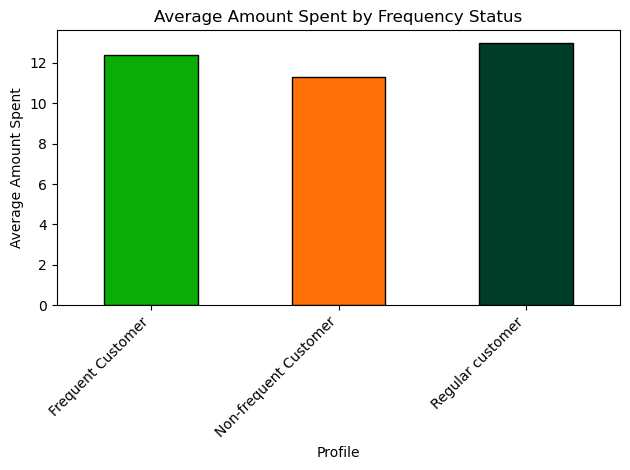

In [116]:
cust_op_wo_low_activity.groupby('frequency_flag')['avg_spend'].mean().plot.bar(color=['#0AAD05', '#FF7009', '#003D29'],edgecolor = "black")
plt.xlabel('Profile')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Frequency Status')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Frequency_Status_AvgSpend_Barchart.png'))

In [117]:
# split original (non-unique user) datafram into two samples for analysis
# create seed

np.random.seed(4)

In [118]:
dev = np.random.rand(len(cust_op_without_low_activity))<= 0.7

In [119]:
#split in two samples

big = cust_op_without_low_activity[dev]
small = cust_op_without_low_activity[~dev]

In [120]:
# check output

len(cust_op_without_low_activity)==len(big)+len(small)

True

In [121]:
# Create new column for day of week 

small.loc[(small['order_day_of_week'] == 0), 'day_of_week'] = 'Saturday'

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/249507963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[(small['order_day_of_week'] == 0), 'day_of_week'] = 'Saturday'


In [122]:
small.loc[(small['order_day_of_week'] == 1), 'day_of_week'] = 'Sunday'

In [123]:
small.loc[(small['order_day_of_week'] == 2), 'day_of_week'] = 'Monday'

In [124]:
small.loc[(small['order_day_of_week'] == 3), 'day_of_week'] = 'Tuesday'

In [125]:
small.loc[(small['order_day_of_week'] == 4), 'day_of_week'] = 'Wednesday'

In [126]:
small.loc[(small['order_day_of_week'] == 5), 'day_of_week'] = 'Thursday'

In [127]:
small.loc[(small['order_day_of_week'] == 6), 'day_of_week'] = 'Friday'

/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


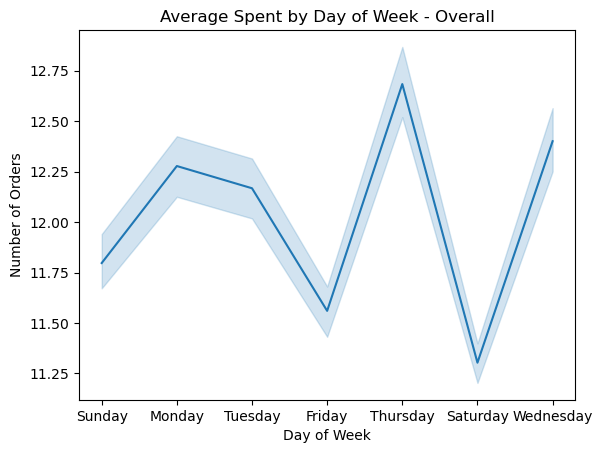

In [128]:
line_1 = sns.lineplot(data = small, x = 'day_of_week',y = 'avg_spend')
plt.title('Average Spent by Day of Week - Overall')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Orders_by_Day_Linechart.png'))

/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


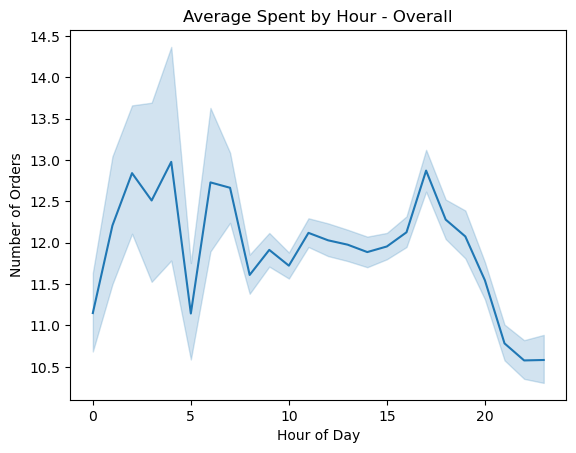

In [129]:
line_2 = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'avg_spend')
plt.title('Average Spent by Hour - Overall')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Orders_by_Hour_Linechart.png'))

In [130]:
small.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
number_of_dependants         int64
family_status               object
income                       int64
order_id                    object
number_of_orders             int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_spend                  float64
spender_flag                object
customer_frequency  

/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


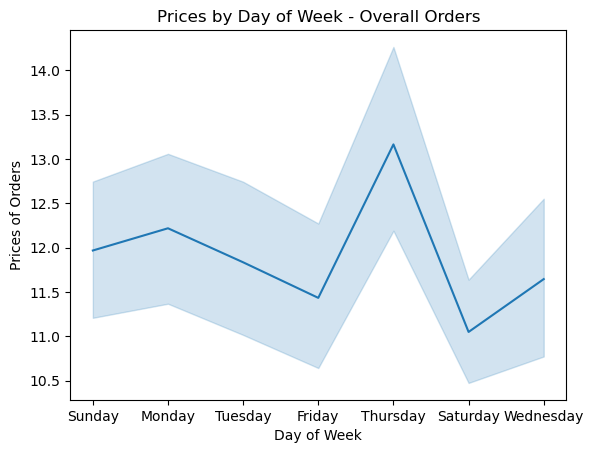

In [131]:
line_3 = sns.lineplot(data = small, x = 'day_of_week',y = 'prices')
plt.title('Prices by Day of Week - Overall Orders')
plt.xlabel('Day of Week')
plt.ylabel('Prices of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Prices_by_Week_Linechart.png'))

/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanayawinder/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


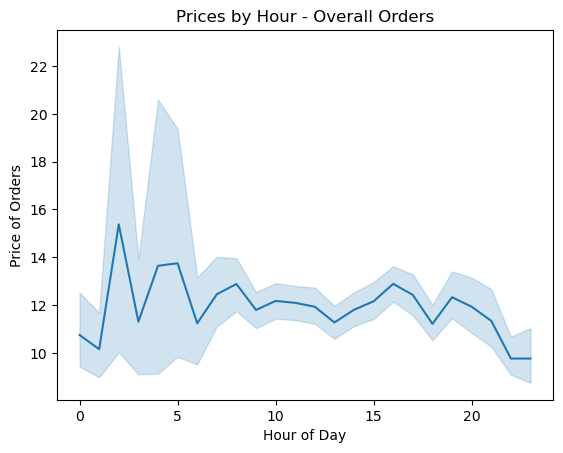

In [132]:
line_4 = sns.lineplot(data = big, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices by Hour - Overall Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Price of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_Prices_by_Hour_Linechart.png'))

### #7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [134]:
cust_op_wo_low_activity.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income,Adult,Family,High-Income Family
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Single,Low-Income Adult
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family,Mid-Income Family
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income,Adult,Single,Low-Income Adult
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income,Adult,Family,Low-Income Family


In [135]:
# Calculate the total amount spent by each customer and assign it to a new column 'total_spent'

cust_op_wo_low_activity['total_spent'] = cust_op_wo_low_activity.groupby('user_id')['prices'].transform(np.sum)

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/367329153.py:3: FutureWarning: The provided callable <function sum at 0x1090df9c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cust_op_wo_low_activity['total_spent'] = cust_op_wo_low_activity.groupby('user_id')['prices'].transform(np.sum)
/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/367329153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity['total_spent'] = cust_op_wo_low_activity.groupby('user_id')['prices'].transform(np.sum)


In [136]:
# check decription of new col

cust_op_wo_low_activity['total_spent'].describe()

count   162631
mean         8
std         74
min          1
25%          5
50%          9
75%         10
max      14900
Name: total_spent, dtype: float64

In [137]:
# calculate mean, min, max for all flags

cust_op_wo_low_activity.groupby('frequency_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                             mean min   max      mean min max
frequency_flag                                               
Frequent Customer               9   1 14900        28   5  99
Non-frequent Customer           8   1    25         8   5  25
Regular customer                8   1 14900        13   5  45

In [138]:
cust_op_wo_low_activity.groupby('loyalty_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                        mean min   max      mean min max
loyalty_flag                                            
Loyal customer             8   1    20        60  41  99
New customer               8   1 14900         7   5  10
Regular customer           8   1 14900        20  11  40

In [139]:
cust_op_wo_low_activity.groupby('age_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                   mean min   max      mean min max
age_flag                                           
Adult                 8   1 14900        19   5  99
Senior                9   1 14900        19   5  99
Young Adult           8   1    24        19   5  99

In [140]:
cust_op_wo_low_activity.groupby('income_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                     mean min   max      mean min max
income_flag                                          
High Income             9   1 14900        19   5  99
Low Income              7   1    24        18   5  99
Middle Income           8   1    24        19   5  99
nan                     6   6     6        30  30  30

In [141]:
cust_op_wo_low_activity.groupby('family_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                   mean min   max      mean min max
family_flag                                        
Family                8   1 14900        19   5  99
Single                8   1    24        19   5  99

In [142]:
cust_op_wo_low_activity.groupby('region').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                 mean min   max      mean min max
region                                           
Midwest             8   1    25        19   5  99
Northeast           8   1 14900        19   5  99
South               8   1    25        19   5  99
West                9   1 14900        19   5  99

In [143]:
cust_op_wo_low_activity.groupby('customer_profile').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent           max_order        
                                      mean min   max      mean min max
customer_profile                                                      
High-Income Adult                        8   1    23        19   5  99
High-Income Family                       8   1 14900        19   5  99
High-Income Senior                       8   1    24        19   5  99
High-Income Senior with Family          10   1 14900        19   5  99
High-Income Young Adult                  8   1    15        20   5  99
High-Income Young Family                 8   1    15        20   5  99
Low-Income Adult                         7   1    22        18   5  99
Low-Income Family                        7   1    23        18   5  99
Low-Income Senior                        7   1    15        17   5  99
Low-Income Senior with Family            7   1    20        17   5  99
Low-Income Young Adult                   8   1    15        18   5  99
Low-Income Young Family                  8   1    24        18   5  99
Mid-Income Adult                         8   1    24        19   5  99
Mid-Income Family                        8   1    24        19   5  99
Mid-Income Senior                        8   1    23        19   5  99
Mid-Income Senior with Family            8   1    23        19   5  99
Mid-Income Young Adult                   8   1    23        19   5  99
Mid-Income Young Family                  8   1    21        20   5  99
nan                                      6   6     6        30  30  30

### #8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [145]:
# Import via OS library

dept = pd.read_csv(os.path.join(path,'02 Data','Original Data','departments.csv'),index_col = False)

In [146]:
cust_op_wo_low_activity.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
number_of_dependants         int64
family_status               object
income                       int64
order_id                    object
number_of_orders             int64
order_day_of_week            int64
order_hour_of_day           object
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_spend                  float64
spender_flag                object
customer_frequency  

In [147]:
dept.dtypes

department_id    object
1                object
2                object
3                object
4                object
5                object
6                object
7                object
8                object
9                object
10               object
11               object
12               object
13               object
14               object
15               object
16               object
17               object
18               object
19               object
20               object
21               object
dtype: object

In [148]:
cust_op_wo_low_activity['department_id'] = cust_op_wo_low_activity['department_id'].astype('str')

/var/folders/tx/v4zzzx0x7735_gq8qjd1ddj00000gn/T/ipykernel_2504/4235638903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_op_wo_low_activity['department_id'] = cust_op_wo_low_activity['department_id'].astype('str')


In [149]:
cust_op_wo_low_activity.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
number_of_dependants         int64
family_status               object
income                       int64
order_id                    object
number_of_orders             int64
order_day_of_week            int64
order_hour_of_day           object
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id               object
prices                     float64
price_range                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_spend                  float64
spender_flag                object
customer_frequency  

In [150]:
dept.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [151]:
# transpose deptartments dataframe

# Transposing the dataframe
dept_t = dept.T

In [152]:
dept_t

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [153]:
dept_t.reset_index(inplace=True)

In [154]:
dept_t.columns = dept_t.iloc[0]

In [155]:
dept_t = dept_t.drop(0)

In [156]:
dept_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [157]:
# combine departments df with cust_op_wo_low_activity

cust_op_high_depts = cust_op_wo_low_activity.merge(dept_t, on='department_id', indicator = 'exists')

In [158]:
grouped = cust_op_high_depts.groupby('region')

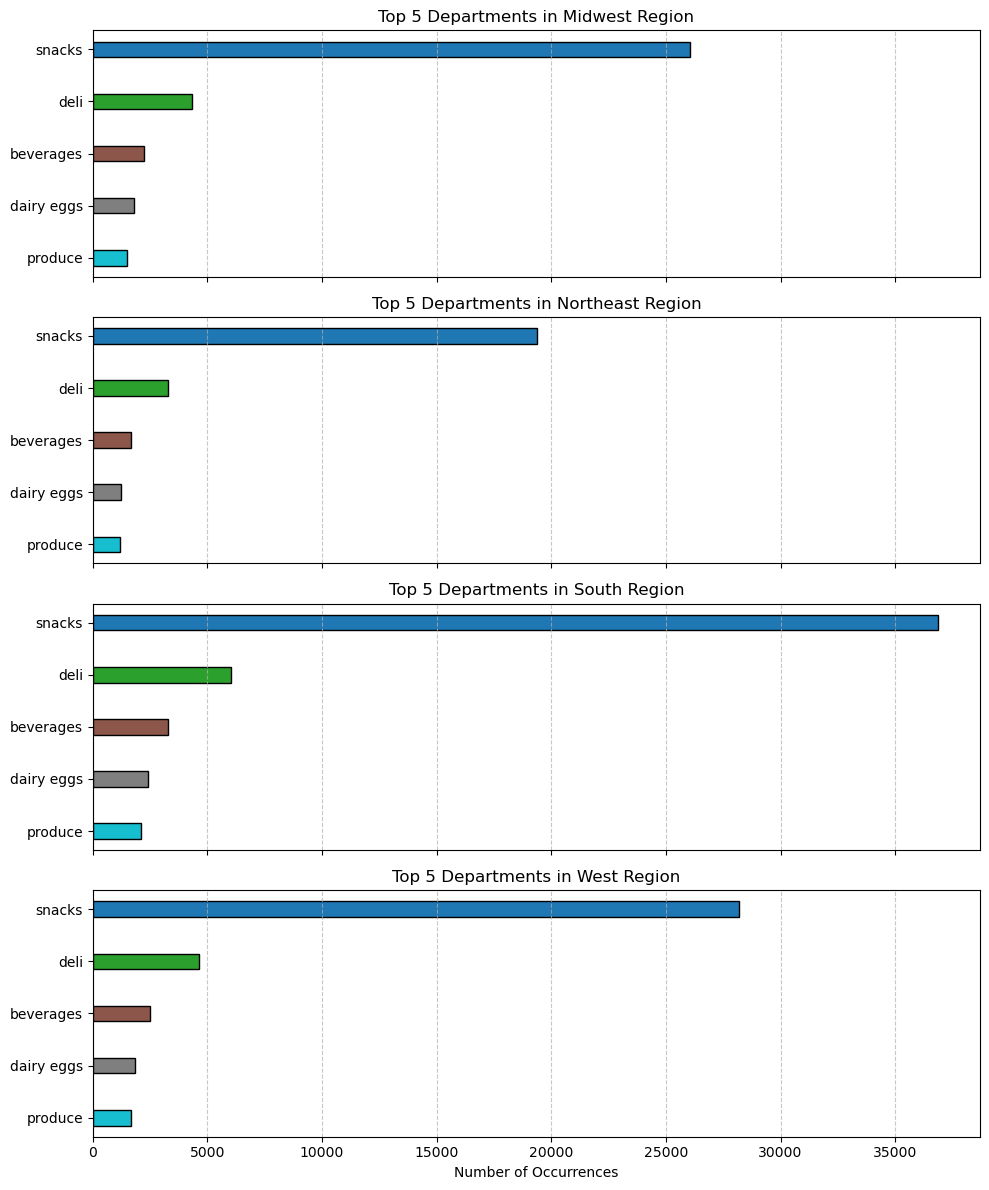

In [159]:
# Define colors for each department
colors = plt.cm.tab10(np.linspace(0, 1, 5))  

# Create subplots for each region
fig, axs = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 12), sharex=True)

# Plotting the horizontal bar chart for each region
for i, (region, data) in enumerate(grouped):
    department_counts = data['department'].value_counts().head(5)
    
    axs[i].barh(np.arange(5), department_counts.values, color=colors, edgecolor='black', height=0.3)  # Set height to make bars thinner
    axs[i].set_yticks(np.arange(5))
    axs[i].set_yticklabels(department_counts.index[::-1])  # Reverse the order of departments
    axs[i].set_ylabel('')
    axs[i].set_title(f'Top 5 Departments in {region.capitalize()} Region')
    axs[i].grid(axis='x', linestyle='--', alpha=0.7)
    axs[i].invert_yaxis()  # Invert the y-axis to show the top department first

plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_top5_region.png'),bbox_inches='tight')
plt.show()

In [160]:
cust_op_high_depts.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_flag,customer_frequency,frequency_flag,_merge,region,exclusion_flag,income_flag,age_flag,family_flag,customer_profile,total_spent,department,exists
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Busiest days,Average orders,8,New customer,8,Low_spender,19,Regular customer,both,Midwest,Not Excluded,High Income,Adult,Family,High-Income Family,9,beverages,both
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30,196,1,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7,Low_spender,26,Non-frequent Customer,both,West,Not Excluded,Low Income,Adult,Single,Low-Income Adult,9,beverages,both
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,2,13,4,196,5,0,Soda,77,7,9,Mid range product,Regularly busy,Regularly busy,Most orders,9,New customer,8,Low_spender,7,Frequent Customer,both,West,Not Excluded,Middle Income,Adult,Family,Mid-Income Family,9,beverages,both
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,644318,1,3,20,NaN,196,3,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Average orders,18,Regular customer,6,Low_spender,18,Regular customer,both,Midwest,Not Excluded,Low Income,Adult,Single,Low-Income Adult,9,beverages,both
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9,196,2,0,Soda,77,7,9,Mid range product,Regularly busy,Slowest days,Most orders,23,Regular customer,6,Low_spender,8,Frequent Customer,both,South,Not Excluded,Low Income,Adult,Family,Low-Income Family,9,beverages,both


In [161]:
crosstab_cust_dept =  pd.crosstab(cust_op_high_depts['customer_profile'],cust_op_high_depts['department'], dropna = False)

In [162]:
crosstab_cust_dept.head()

department,alcohol,babies,bakery,beverages,breakfast,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,
High-Income Adult,13,2,25,486,32,23,1198,465,3,112,70,6,11,0,313,6,2,7223,310
High-Income Family,43,8,68,1476,96,64,3423,1396,22,341,184,9,31,1,912,4,0,21741,910
High-Income Senior,14,5,19,341,23,20,772,323,4,81,43,1,6,0,208,4,0,4988,232
High-Income Senior with Family,25,8,66,1047,59,34,2341,979,17,215,139,9,18,0,646,7,0,15069,712
High-Income Young Adult,0,0,0,12,1,0,21,9,1,0,1,0,0,0,3,0,0,102,1


In [163]:
crosstab_cust_dept.tail()

department,alcohol,babies,bakery,beverages,breakfast,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,
Mid-Income Senior,2,0,4,118,10,0,224,86,1,20,18,1,3,0,58,1,0,1258,59
Mid-Income Senior with Family,10,3,19,262,19,10,638,268,8,61,30,1,8,0,186,3,0,4051,171
Mid-Income Young Adult,6,0,6,147,10,5,356,146,1,22,17,0,2,0,95,2,0,2184,100
Mid-Income Young Family,12,1,19,398,26,22,985,459,6,87,61,5,6,0,259,1,0,6523,285
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [164]:
# Drop nan row
crosstab_cust_dept_2 = crosstab_cust_dept.drop('nan')

In [165]:
# Sort the columns by the sum of each column in descending order
crosstab_cust_dept_3 = crosstab_cust_dept_2[crosstab_cust_dept_2.sum().sort_values(ascending=False).index]

<Figure size 800x1000 with 0 Axes>

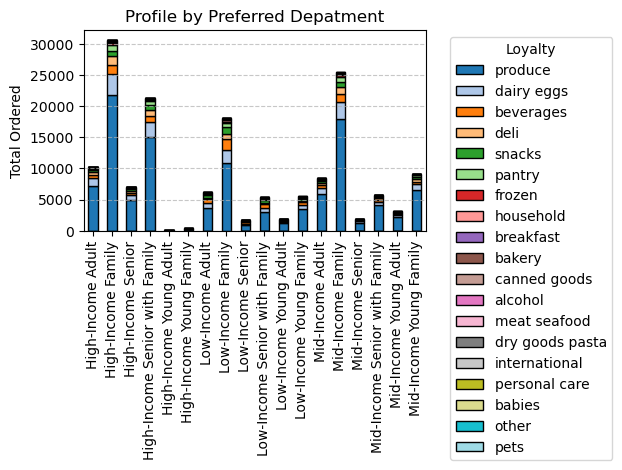

In [166]:
plt.figure(figsize=(8, 10)) 
crosstab_cust_dept_3.plot(kind='bar', stacked=True, colormap = 'tab20', edgecolor = 'black')
plt.title('Profile by Preferred Depatment')
plt.xlabel('')
plt.ylabel('Total Ordered')
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','IC_stacked_profile_dept.png'),bbox_inches='tight')
plt.show()